### 01FB16ECS388   SK SAQLAIN MUSTAQ<BR/>01FB16ECS399   SUMAIR AHMED SHARIFF<BR/>01FB16ECS408 HARSHVARDHAN SUROLIA

In [58]:
data=open('Alice-in-wonderland.txt','r')
raw=data.readlines()
story=raw[127:5405]
story=story[39:]

In [59]:
import re
r1=re.findall(r"\n\n[ A-Z]+\n",''.join(story))
# print(r1)
character_entry_order=list()
for ele in r1:
    dat=ele.strip(" \n")
    if(dat.startswith("SCENE") or dat.startswith("ACT")):
        pass
    else:
        character_entry_order.append(dat)
unique_characters=list(set(character_entry_order))

In [60]:
unique_characters

['ALL THE GARDENERS',
 'QUEEN',
 'CARROLL',
 'WHITE QUEEN',
 'RABBIT',
 'CURTAIN',
 'RED QUEEN',
 'DUM',
 'BOTH QUEENS',
 'CATERPILLAR',
 'JURY',
 'ONE JUROR',
 'CAT',
 'KING',
 'MOCK TURTLE',
 'COURT',
 'FROG',
 'DORMOUSE',
 'DUCHESS',
 'WHITE RABBIT',
 'HUMPTY DUMPTY',
 'KNAVE',
 'QUEEN OF HEARTS',
 'JABBERWOCKY',
 'GRYPHON',
 'EVERYBODY',
 'HATTER',
 'OTHERS',
 'ALICE',
 'MARCH HARE',
 'DEE',
 'JURORS']

In [61]:
unique_characters_processed=list()
for ele in unique_characters:
    unique_characters_processed.append(ele.lower())

In [62]:
story_processed=list()
for ele in story:
    story_processed.append(ele.strip("\n").lower())
# story_processed=re.sub(r"\[[^\]]*\]",r'__',''.join(story_processed))
print(story_processed)

['act i', '', '', 'scene one', '', "_alice's home. lewis carroll is discovered, playing chess. golden-haired", 'alice, in a little blue dress, a black kitten in her arms, stands watching', 'him._', '', '', 'alice', '', "that's a funny game, uncle. what did you do then?", '', '', 'carroll', '', 'a red pawn took a white pawn; this way. you see, alice, the chessboard is', 'divided into sixty-four squares, red and white, and the white army tries', "to win and the red army tries to win. it's like a battle!", '', '', 'alice', '', 'with soldiers?', '', '', 'carroll', '', "yes, here are the kings and queens they are fighting for. that's the red", "queen and here's the white queen.", '', '', 'alice', '', 'how funny they look!', '', '', 'carroll', '', 'see the crowns on their heads, and look at their big feet.', '', '', 'alice', '', "it's a foot apiece, that's what it is! do they hump along like this?", '', '', 'carroll', '', "here! you're spoiling the game. i must keep them all in their right",

In [63]:
expression='|'.join(unique_characters_processed)
expression='('+expression+')+'

In [64]:
data=re.findall(expression,' '.join(story_processed))

In [65]:
import numpy as np
import nltk
from nltk import bigrams
import itertools
import pandas as pd
 

def generate_co_occurrence_matrix(corpus):
    vocab = set(corpus)
    vocab = list(vocab)
    vocab_index = {word: i for i, word in enumerate(vocab)}
 
    # Create bigrams from all words in corpus
    bi_grams = list(bigrams(corpus))
 
    # Frequency distribution of bigrams ((word1, word2), num_occurrences)
    bigram_freq = nltk.FreqDist(bi_grams).most_common(len(bi_grams))
 
    # Initialise co-occurrence matrix
    # co_occurrence_matrix[current][previous]
    co_occurrence_matrix = np.zeros((len(vocab), len(vocab)))
 
    # Loop through the bigrams taking the current and previous word,
    # and the number of occurrences of the bigram.
    for bigram in bigram_freq:
        current = bigram[0][1]
        previous = bigram[0][0]
        count = bigram[1]
        pos_current = vocab_index[current]
        pos_previous = vocab_index[previous]
        co_occurrence_matrix[pos_current][pos_previous] = count
    co_occurrence_matrix = np.matrix(co_occurrence_matrix)
 
    # return the matrix and the index
    return co_occurrence_matrix, vocab_index
 
 
text_data = [data]
 
# Create one list using many lists
data = list(itertools.chain.from_iterable(text_data))
matrix, vocab_index = generate_co_occurrence_matrix(data)
 
 
data_matrix = pd.DataFrame(matrix, index=vocab_index,
                             columns=vocab_index)

In [66]:
for  i in range(31):
    data_matrix.iloc[i,i]=0
data_matrix=data_matrix.drop(index=["curtain","both queens"],columns=["curtain","both queens"])

In [67]:
data_matrix

,jury,jabberwocky,rabbit,all the gardeners,cat,red queen,alice,court,king,frog,...,white queen,mock turtle,jurors,queen,humpty dumpty,dum,knave,one juror,others,duchess
jury,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,7.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
jabberwocky,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
rabbit,0.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
all the gardeners,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cat,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,3.0,2.0,...,1.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0
red queen,0.0,1.0,0.0,0.0,0.0,0.0,31.0,0.0,3.0,0.0,...,7.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
alice,2.0,0.0,4.0,1.0,19.0,34.0,0.0,1.0,33.0,15.0,...,34.0,22.0,0.0,34.0,17.0,0.0,5.0,1.0,4.0,17.0
court,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
king,4.0,0.0,0.0,0.0,3.0,2.0,35.0,2.0,0.0,4.0,...,2.0,0.0,1.0,5.0,3.0,0.0,8.0,0.0,0.0,3.0
frog,0.0,0.0,1.0,0.0,2.0,0.0,12.0,0.0,1.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,6.0


In [68]:
#pre-processing the matrix
edge_list=list()
for i in range(data_matrix.shape[0]):
    for j in range(data_matrix.shape[1]):
        if(data_matrix.iloc[i,j]>0 and i!=j):
            edge_list.append((data_matrix.columns[i],data_matrix.columns[j],{"weight":data_matrix.iloc[i,j]}))
            
# edge_list=list(set(edge_list)) 
edge_list

[('jury', 'alice', {'weight': 2.0}),
 ('jury', 'court', {'weight': 1.0}),
 ('jury', 'king', {'weight': 7.0}),
 ('jury', 'queen', {'weight': 1.0}),
 ('jury', 'knave', {'weight': 1.0}),
 ('jabberwocky', 'king', {'weight': 1.0}),
 ('rabbit', 'red queen', {'weight': 1.0}),
 ('rabbit', 'alice', {'weight': 6.0}),
 ('rabbit', 'king', {'weight': 1.0}),
 ('rabbit', 'hatter', {'weight': 1.0}),
 ('rabbit', 'carroll', {'weight': 1.0}),
 ('rabbit', 'queen', {'weight': 1.0}),
 ('all the gardeners', 'alice', {'weight': 1.0}),
 ('cat', 'alice', {'weight': 19.0}),
 ('cat', 'king', {'weight': 3.0}),
 ('cat', 'frog', {'weight': 2.0}),
 ('cat', 'white queen', {'weight': 1.0}),
 ('cat', 'mock turtle', {'weight': 2.0}),
 ('cat', 'queen', {'weight': 2.0}),
 ('cat', 'duchess', {'weight': 4.0}),
 ('red queen', 'jabberwocky', {'weight': 1.0}),
 ('red queen', 'alice', {'weight': 31.0}),
 ('red queen', 'king', {'weight': 3.0}),
 ('red queen', 'dee', {'weight': 3.0}),
 ('red queen', 'everybody', {'weight': 1.0}),


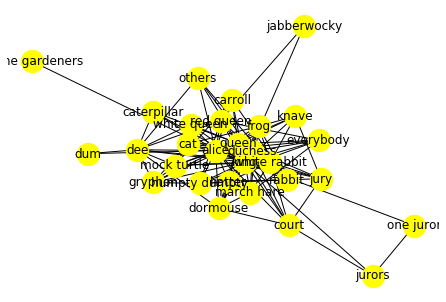

In [69]:
import warnings
warnings.filterwarnings('ignore')

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

G = nx.Graph()
G.add_edges_from(edge_list)
nx.draw(G, node_size=500, node_color='yellow', with_labels=True)

#for gephi
nx.write_gexf(G,"test.gexf")

In [70]:
G.degree('alice')

26

In [71]:
list(G.edges(data=True))

[('jury', 'alice', {'weight': 2.0}),
 ('jury', 'court', {'weight': 1.0}),
 ('jury', 'king', {'weight': 4.0}),
 ('jury', 'queen', {'weight': 1.0}),
 ('jury', 'knave', {'weight': 1.0}),
 ('jury', 'white rabbit', {'weight': 3.0}),
 ('jury', 'hatter', {'weight': 1.0}),
 ('alice', 'rabbit', {'weight': 4.0}),
 ('alice', 'all the gardeners', {'weight': 1.0}),
 ('alice', 'cat', {'weight': 19.0}),
 ('alice', 'red queen', {'weight': 34.0}),
 ('alice', 'court', {'weight': 1.0}),
 ('alice', 'king', {'weight': 35.0}),
 ('alice', 'frog', {'weight': 12.0}),
 ('alice', 'dee', {'weight': 9.0}),
 ('alice', 'dormouse', {'weight': 7.0}),
 ('alice', 'white rabbit', {'weight': 9.0}),
 ('alice', 'hatter', {'weight': 22.0}),
 ('alice', 'everybody', {'weight': 2.0}),
 ('alice', 'caterpillar', {'weight': 9.0}),
 ('alice', 'carroll', {'weight': 12.0}),
 ('alice', 'gryphon', {'weight': 8.0}),
 ('alice', 'march hare', {'weight': 11.0}),
 ('alice', 'white queen', {'weight': 35.0}),
 ('alice', 'mock turtle', {'weigh

In [72]:
s='\n The graph details: '
print (s)


a=G.number_of_nodes()
s='\n The no of nodes: ' +repr(a)
print (s)

a= G.number_of_edges()
s='\n The no of edges: ' +repr(a)
print (s)

deg=nx.degree(G)

#Converting degree view into list
deg1=list(deg)

#sorting the list based on degree
deg1.sort(key=lambda x:x[1])

a= deg1[0]
s='\n The min degree: ' +repr(a)
print (s)

a = deg1[-1]
s='\n The max degree: ' +repr(a)
print (s)

a= G.number_of_edges()
s='\n The no of edges: ' +repr(a)
print (s)


 The graph details: 

 The no of nodes: 29

 The no of edges: 124

 The min degree: ('all the gardeners', 1)

 The max degree: ('alice', 26)

 The no of edges: 124


In [73]:
from operator import itemgetter

In [74]:
#Degree Centrality
degc = nx.degree_centrality(G)
# let's list the scores
x=sorted(degc.items(), key=itemgetter(1), reverse=True)
# print(x)
x

[('alice', 0.9285714285714285),
 ('king', 0.8571428571428571),
 ('queen', 0.7142857142857142),
 ('white rabbit', 0.5),
 ('duchess', 0.39285714285714285),
 ('dee', 0.39285714285714285),
 ('frog', 0.3571428571428571),
 ('rabbit', 0.3214285714285714),
 ('red queen', 0.3214285714285714),
 ('hatter', 0.3214285714285714),
 ('dormouse', 0.3214285714285714),
 ('court', 0.2857142857142857),
 ('cat', 0.2857142857142857),
 ('mock turtle', 0.2857142857142857),
 ('march hare', 0.2857142857142857),
 ('jury', 0.25),
 ('everybody', 0.25),
 ('gryphon', 0.25),
 ('humpty dumpty', 0.25),
 ('knave', 0.21428571428571427),
 ('white queen', 0.21428571428571427),
 ('carroll', 0.17857142857142855),
 ('others', 0.17857142857142855),
 ('caterpillar', 0.14285714285714285),
 ('jurors', 0.10714285714285714),
 ('jabberwocky', 0.07142857142857142),
 ('one juror', 0.07142857142857142),
 ('dum', 0.07142857142857142),
 ('all the gardeners', 0.03571428571428571)]

In [75]:
#Betweeness Centrality
bet = nx.betweenness_centrality(G)
# let's list the scores
sorted(bet.items(), key=itemgetter(1), reverse=True)

[('alice', 0.30477555219618707),
 ('king', 0.20854539346602832),
 ('queen', 0.08537205005458974),
 ('dee', 0.031069958847736626),
 ('white rabbit', 0.02806752330561854),
 ('red queen', 0.019359410430839),
 ('duchess', 0.01281599059376837),
 ('court', 0.01144914756025867),
 ('frog', 0.007547031158142269),
 ('rabbit', 0.007413706223230032),
 ('hatter', 0.006866759049298731),
 ('dormouse', 0.005999622071050642),
 ('cat', 0.004761904761904762),
 ('mock turtle', 0.004497354497354497),
 ('humpty dumpty', 0.0041005291005291),
 ('everybody', 0.0037950365331317704),
 ('gryphon', 0.0035966238347190727),
 ('jurors', 0.003527336860670194),
 ('march hare', 0.0032291929117325945),
 ('one juror', 0.0026895943562610224),
 ('jury', 0.0014991181657848323),
 ('white queen', 0.001455026455026455),
 ('others', 0.0007936507936507938),
 ('knave', 0.0005291005291005291),
 ('carroll', 0.0005291005291005291),
 ('caterpillar', 0.00026455026455026457),
 ('jabberwocky', 0.0),
 ('all the gardeners', 0.0),
 ('dum', 

In [76]:
#Closness Centrality
clos = nx.closeness_centrality(G)
# let's list the scores
sorted(clos.items(), key=itemgetter(1), reverse=True)

[('alice', 0.9333333333333333),
 ('king', 0.875),
 ('queen', 0.7777777777777778),
 ('white rabbit', 0.6666666666666666),
 ('duchess', 0.6222222222222222),
 ('dee', 0.6222222222222222),
 ('frog', 0.6086956521739131),
 ('rabbit', 0.5957446808510638),
 ('red queen', 0.5957446808510638),
 ('hatter', 0.5957446808510638),
 ('dormouse', 0.5957446808510638),
 ('court', 0.5833333333333334),
 ('cat', 0.5833333333333334),
 ('mock turtle', 0.5833333333333334),
 ('march hare', 0.5833333333333334),
 ('jury', 0.5714285714285714),
 ('everybody', 0.5714285714285714),
 ('gryphon', 0.5714285714285714),
 ('humpty dumpty', 0.5714285714285714),
 ('knave', 0.56),
 ('white queen', 0.56),
 ('carroll', 0.5490196078431373),
 ('caterpillar', 0.5384615384615384),
 ('others', 0.5283018867924528),
 ('one juror', 0.509090909090909),
 ('jurors', 0.5),
 ('dum', 0.5),
 ('all the gardeners', 0.49122807017543857),
 ('jabberwocky', 0.4827586206896552)]

In [77]:
#Eigenvector Centrality
eig = nx.eigenvector_centrality(G)
# let's list the scores
sorted(eig.items(), key=itemgetter(1), reverse=True)

[('alice', 0.3750389127530835),
 ('king', 0.36381440874774157),
 ('queen', 0.32656475326886264),
 ('white rabbit', 0.25891103024163603),
 ('duchess', 0.21747224826927772),
 ('frog', 0.20902772405738965),
 ('dormouse', 0.19115437683148082),
 ('hatter', 0.18839514652962414),
 ('rabbit', 0.18665154408963355),
 ('dee', 0.18120356765248427),
 ('march hare', 0.1699744539027338),
 ('cat', 0.16926685120930596),
 ('mock turtle', 0.16924225390238362),
 ('court', 0.16866272021606446),
 ('red queen', 0.16565644458421733),
 ('jury', 0.15885643984996137),
 ('everybody', 0.1525609910251603),
 ('gryphon', 0.14966006509812999),
 ('knave', 0.1470232485050985),
 ('humpty dumpty', 0.1374289010711694),
 ('white queen', 0.1374083431755716),
 ('carroll', 0.12348686730828215),
 ('others', 0.11808948150425701),
 ('caterpillar', 0.10830921419463367),
 ('jurors', 0.049467271738261084),
 ('dum', 0.04832759961134449),
 ('jabberwocky', 0.04600175902035391),
 ('one juror', 0.03688201464954133),
 ('all the gardeners'

In [78]:
import seaborn as sns
centrality_measures = {
    'degree': degc,
    'betweenness': bet,
    'closeness': clos,
    'eigenvector': eig,
}
centrality = pd.DataFrame(centrality_measures)
centrality

,degree,betweenness,closeness,eigenvector
alice,0.928571,0.304776,0.933333,0.375039
all the gardeners,0.035714,0.000000,0.491228,0.032584
carroll,0.178571,0.000529,0.549020,0.123487
cat,0.285714,0.004762,0.583333,0.169267
caterpillar,0.142857,0.000265,0.538462,0.108309
court,0.285714,0.011449,0.583333,0.168663
dee,0.392857,0.031070,0.622222,0.181204
dormouse,0.321429,0.006000,0.595745,0.191154
duchess,0.392857,0.012816,0.622222,0.217472
dum,0.071429,0.000000,0.500000,0.048328


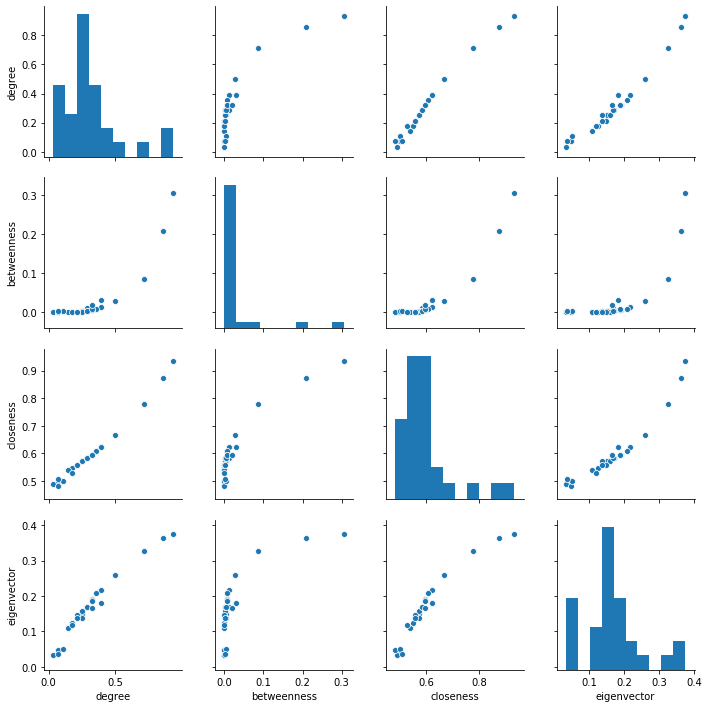

In [79]:
sns.pairplot(centrality)

Edge analysis

In [80]:
ebc=nx.edge_betweenness_centrality(G, normalized=True, weight=None)
ebl=sorted(ebc.items(),
       key=lambda i: i[1],
       reverse=True)[:5]
s='\n Top 5 edge betweenness centrality   :\n'
print (s)
for item in ebl:
    s= repr(item) + ','
    print (s)


 Top 5 edge betweenness centrality   :

(('alice', 'all the gardeners'), 0.06896551724137931),
(('alice', 'one juror'), 0.0657224958949097),
(('king', 'jurors'), 0.054187192118226604),
(('king', 'jabberwocky'), 0.05367405582922824),
(('alice', 'dum'), 0.053571428571428575),


In [81]:
from operator import itemgetter
s='\n sorted pagerank:\n'
print (s)
pgr=nx.pagerank(G)
print (sorted(pgr.items(), key=itemgetter(1), reverse=True))


 sorted pagerank:

[('alice', 0.2548949312076554), ('king', 0.08666288241012488), ('queen', 0.06454259634674726), ('hatter', 0.044746072245743056), ('duchess', 0.044560152324418345), ('red queen', 0.04081195856615169), ('mock turtle', 0.040563611162737816), ('white rabbit', 0.035934309919245365), ('white queen', 0.035622043218314234), ('dee', 0.031786366515489314), ('march hare', 0.03174268717486603), ('cat', 0.027342488478846905), ('gryphon', 0.026982149229980896), ('frog', 0.024793373259538405), ('humpty dumpty', 0.023839899357353627), ('dormouse', 0.02290551937192351), ('dum', 0.017901989266659), ('knave', 0.01615688597647561), ('carroll', 0.01564056167930176), ('rabbit', 0.015503216010955506), ('court', 0.015480958165492262), ('jury', 0.014695739204135376), ('caterpillar', 0.01302969009671983), ('everybody', 0.011224109779108813), ('jurors', 0.010814192122394019), ('others', 0.010617286984836709), ('one juror', 0.008869983156382454), ('jabberwocky', 0.006528406047464328), ('all th

# Ego network of top 5 character based on page rank centrality

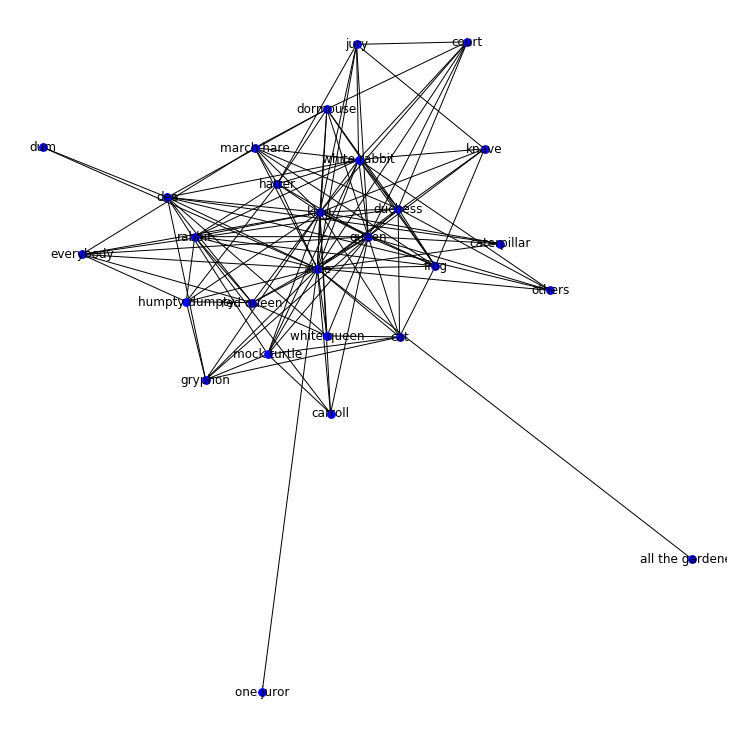

In [82]:
s='alice'
#u = unicode(s, "utf-8")
hub_ego=nx.ego_graph(G,s)
# Draw graph
plt.figure(figsize=(10,10))
pos=nx.spring_layout(hub_ego)
nx.draw(hub_ego,pos,node_color='b',node_size=60,with_labels=True)
# Draw ego as large and red
#nx.draw_networkx_nodes(hub_ego,pos,with_labels = True,nodelist=[largest_hub],node_size=300,node_color='r')

plt.savefig('alice.png')
plt.show()
#nx.write_gml(hub_ego,"egonw_medici.gml")

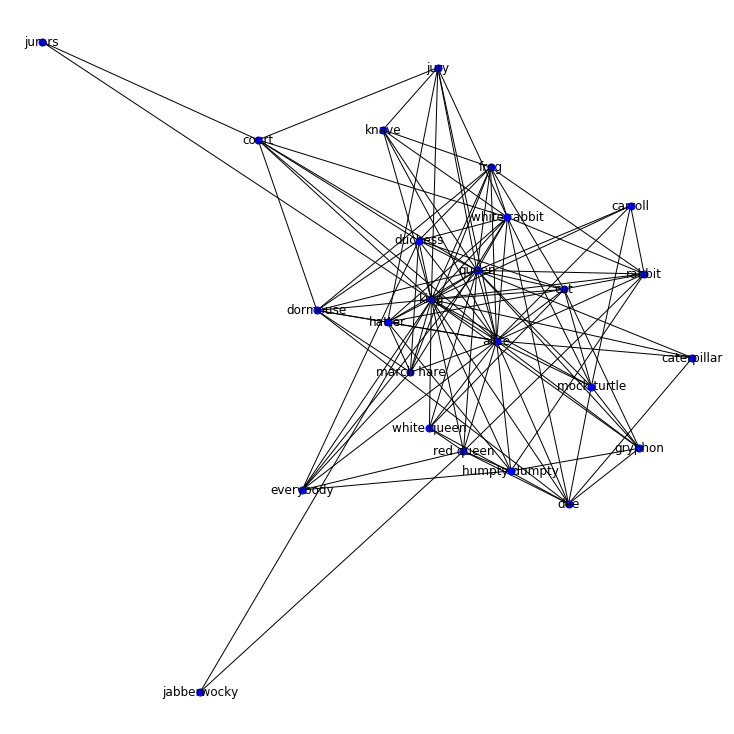

In [83]:
s='king'
#u = unicode(s, "utf-8")
hub_ego=nx.ego_graph(G,s)
# Draw graph
plt.figure(figsize=(10,10))
pos=nx.spring_layout(hub_ego)
nx.draw(hub_ego,pos,node_color='b',node_size=50,with_labels=True)
# Draw ego as large and red
#nx.draw_networkx_nodes(hub_ego,pos,with_labels = True,nodelist=[largest_hub],node_size=300,node_color='r')
plt.savefig('king.png')
plt.show()
#nx.write_gml(hub_ego,"egonw_medici.gml")

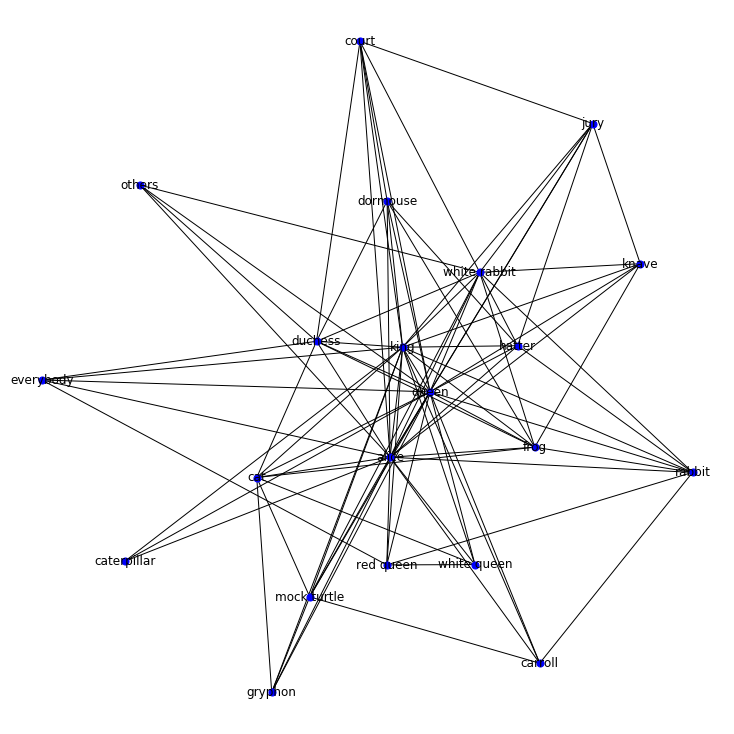

In [84]:
s='queen'
#u = unicode(s, "utf-8")
hub_ego=nx.ego_graph(G,s)
# Draw graph
plt.figure(figsize=(10,10))
pos=nx.spring_layout(hub_ego)
nx.draw(hub_ego,pos,node_color='b',node_size=50,with_labels=True)
# Draw ego as large and red
#nx.draw_networkx_nodes(hub_ego,pos,with_labels = True,nodelist=[largest_hub],node_size=300,node_color='r')
plt.savefig('queen.png')
plt.show()
#nx.write_gml(hub_ego,"egonw_medici.gml")

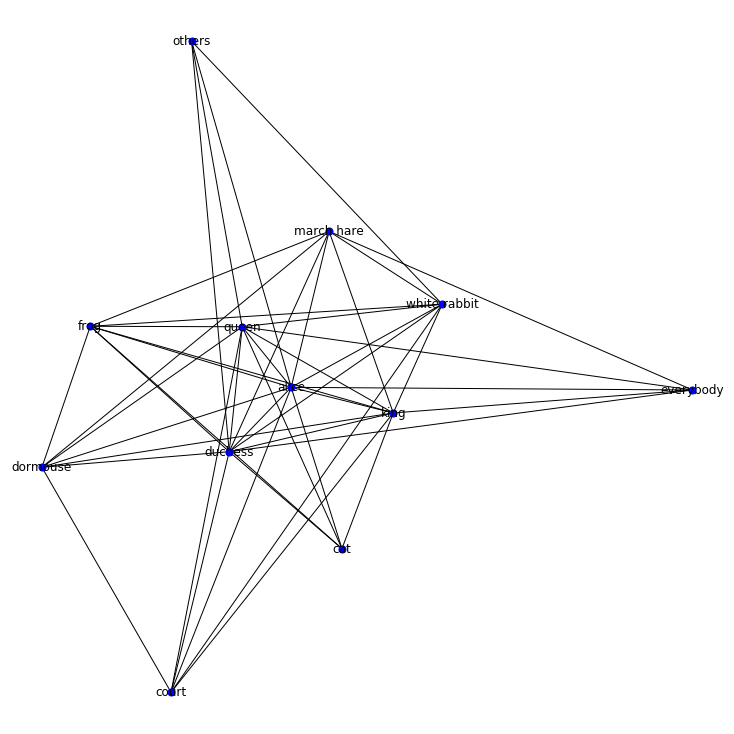

In [85]:
s='duchess'
#u = unicode(s, "utf-8")
hub_ego=nx.ego_graph(G,s)
# Draw graph
plt.figure(figsize=(10,10))
pos=nx.spring_layout(hub_ego)
nx.draw(hub_ego,pos,node_color='b',node_size=50,with_labels=True)
# Draw ego as large and red
#nx.draw_networkx_nodes(hub_ego,pos,with_labels = True,nodelist=[largest_hub],node_size=300,node_color='r')
plt.savefig('duchess.png')
plt.show()
#nx.write_gml(hub_ego,"egonw_medici.gml")

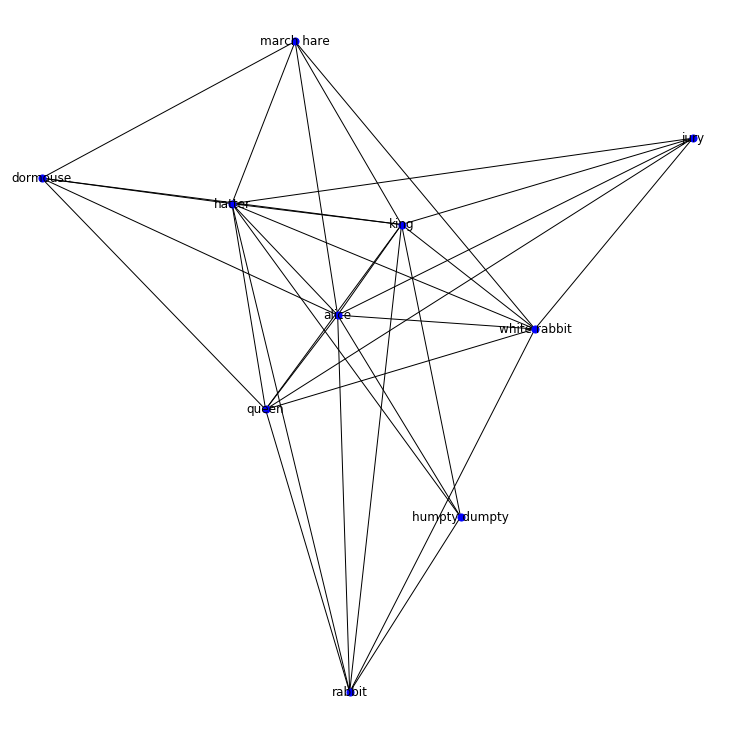

In [86]:
s='hatter'
#u = unicode(s, "utf-8")
hub_ego=nx.ego_graph(G,s)
# Draw graph
plt.figure(figsize=(10,10))
pos=nx.spring_layout(hub_ego)
nx.draw(hub_ego,pos,node_color='b',node_size=50,with_labels=True)
# Draw ego as large and red
#nx.draw_networkx_nodes(hub_ego,pos,with_labels = True,nodelist=[largest_hub],node_size=300,node_color='r')
plt.savefig('hatter.png')
plt.show()
#nx.write_gml(hub_ego,"egonw_medici.gml")

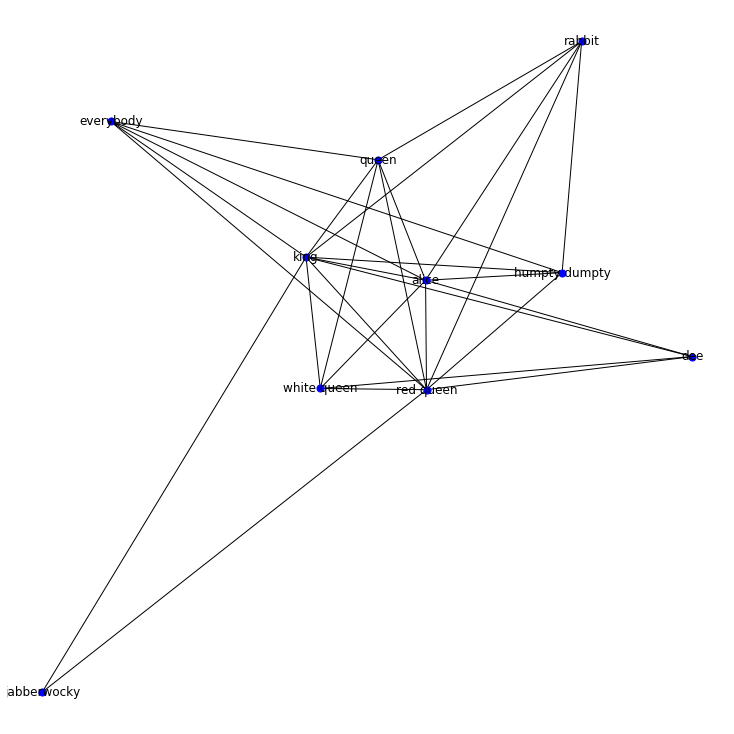

In [87]:
s='red queen'
#u = unicode(s, "utf-8")
hub_ego=nx.ego_graph(G,s)
# Draw graph
plt.figure(figsize=(10,10))
pos=nx.spring_layout(hub_ego)
nx.draw(hub_ego,pos,node_color='b',node_size=50,with_labels=True)
# Draw ego as large and red
#nx.draw_networkx_nodes(hub_ego,pos,with_labels = True,nodelist=[largest_hub],node_size=300,node_color='r')
plt.savefig('hatter.png')
plt.show()
#nx.write_gml(hub_ego,"egonw_medici.gml")

In [88]:
# diameter
d=nx.diameter(G)
print("Diameter",end=' ')
print(d)

#aveerage path length
aspl=nx.average_shortest_path_length(G)
print("Average Shortest Path Length",end=' ')
print(aspl)

Diameter 3
Average Shortest Path Length 1.7118226600985222


## Density

In [89]:
nx.density(G)

0.3054187192118227

<h3>Degree Distribution

Degree sequence
[26, 24, 20, 14, 11, 11, 10, 9, 9, 9, 9, 8, 8, 8, 8, 7, 7, 7, 7, 6, 6, 5, 5, 4, 3, 2, 2, 2, 1]
Average Degree:	8.551724137931034


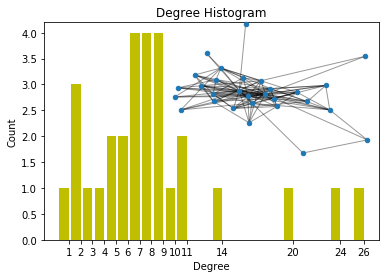

In [90]:
# degree distribution

import collections
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
print ("Degree sequence")
print(degree_sequence)
print("Average Degree:",end="\t")
print(sum(degree_sequence)/len(degree_sequence))
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='y')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()

(0.9, 10001)

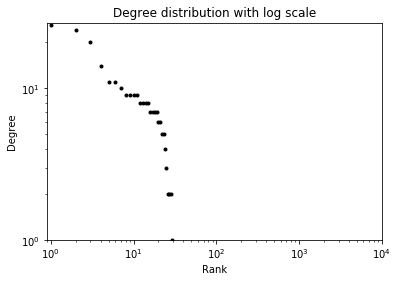

In [91]:
plt.loglog(range(1,G.order()+1),degree_sequence,'k.')
plt.title("Degree distribution with log scale")
plt.xlabel('Rank')
plt.ylabel('Degree')
plt.ylim(1,max(degree_sequence)+1)
plt.xlim(.9,10001)


<h3>Components

Just 1 big component


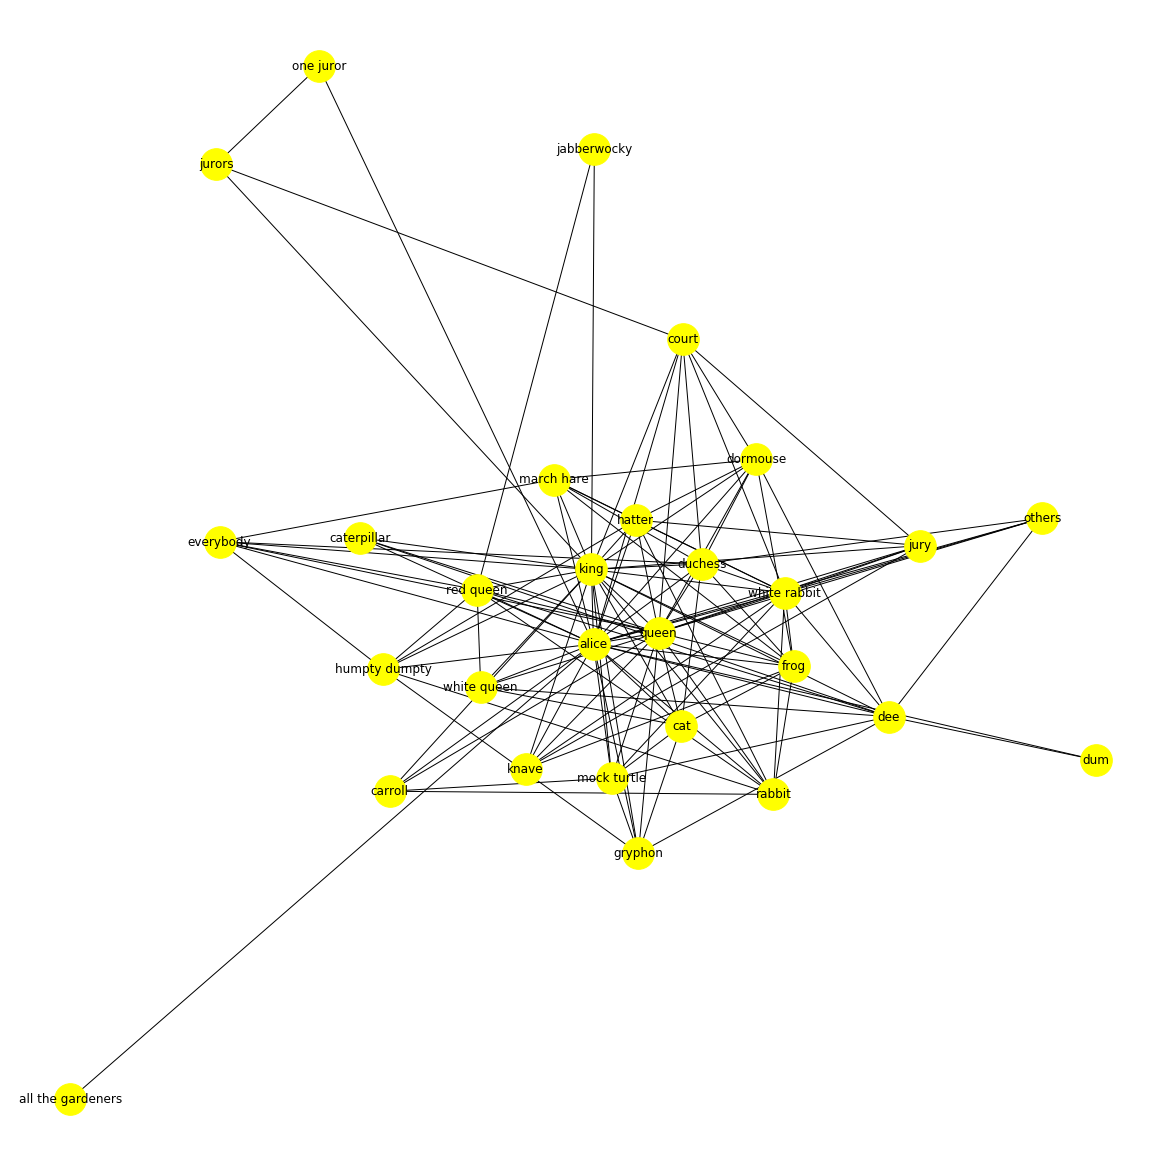

In [92]:
gc = max(nx.connected_component_subgraphs(G))
# gc
plt.figure(figsize=(16,16))
nx.draw(gc, node_size=1000, node_color='yellow', with_labels=True)
# nx.draw(G, node_size=500, node_color='yellow', with_labels=True)

print("Just 1 big component")

<h3> Assortattivity

In [93]:
# Degree assortativity in the graph
r=nx.degree_assortativity_coefficient(G)
print("Assortativity: ",end="")
print(r)

Assortativity: -0.3586191530910463


<h3> Clustering Coefficient

In [94]:
cl=nx.clustering(G)
print(cl)
avg_cl=sum(cl.values())/len(cl)
print("\n\nAverge Clustering Co-efficient:",end="")
print(avg_cl)

#for main nodes:
#x is degree centralities
t=x[:5]
# print(x)
print("\n\nClustering Coefficient of:")
for ele in t:
    s= ele[0] +' '+ str(cl[ele[0]])
    print(s)

{'jury': 0.8571428571428571, 'alice': 0.28615384615384615, 'court': 0.6785714285714286, 'king': 0.32608695652173914, 'queen': 0.3684210526315789, 'knave': 0.9333333333333333, 'jabberwocky': 1.0, 'rabbit': 0.6666666666666666, 'red queen': 0.5555555555555556, 'hatter': 0.6666666666666666, 'carroll': 0.9, 'all the gardeners': 0, 'cat': 0.7142857142857143, 'frog': 0.6888888888888889, 'white queen': 0.8, 'mock turtle': 0.7142857142857143, 'duchess': 0.6363636363636364, 'dee': 0.38181818181818183, 'everybody': 0.7142857142857143, 'dormouse': 0.6666666666666666, 'white rabbit': 0.5164835164835165, 'caterpillar': 0.8333333333333334, 'gryphon': 0.7142857142857143, 'march hare': 0.75, 'humpty dumpty': 0.6666666666666666, 'one juror': 0, 'others': 0.8, 'jurors': 0.3333333333333333, 'dum': 1.0}


Averge Clustering Co-efficient:0.6265274291014052


Clustering Coefficient of:
alice 0.28615384615384615
king 0.32608695652173914
queen 0.3684210526315789
white rabbit 0.5164835164835165
duchess 0.6363636

<h1><b> Community Detection</b></h1><br><h3><b> Louvain</b>

In [95]:
# Community Detection
#louvain

'''the community library has changed it now has a seperate package inside called as 
community_louvain.

installation command:
pip install python-louvain

will have to be imported as "community"
'''


'the community library has changed it now has a seperate package inside called as \ncommunity_louvain.\n\ninstallation command:\npip install python-louvain\n\nwill have to be imported as "community"\n'

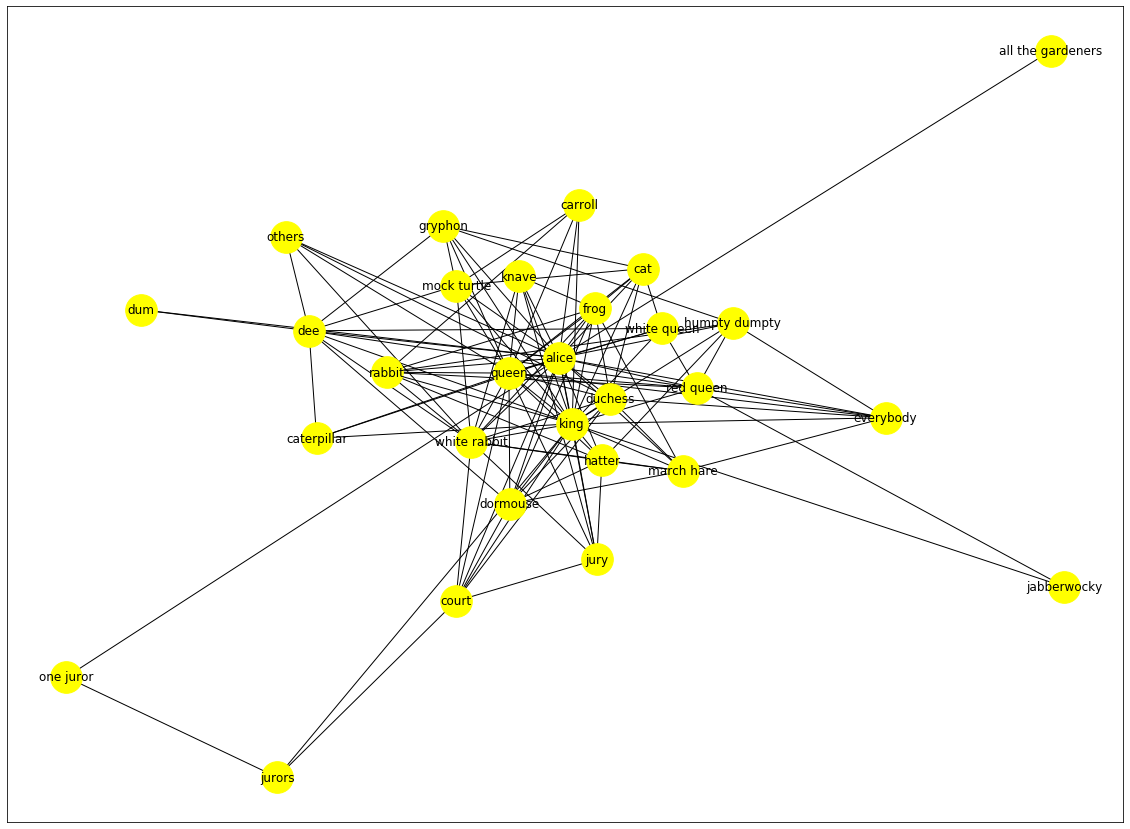

In [96]:
plt.figure(figsize=(20,15))
nx.draw_networkx(G,with_labels=True, node_size=1000,node_color='yellow')

In [97]:
from networkx.algorithms.community.centrality import girvan_newman
communities_generator = girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

[['alice',
  'carroll',
  'cat',
  'caterpillar',
  'court',
  'dee',
  'dormouse',
  'duchess',
  'dum',
  'everybody',
  'frog',
  'gryphon',
  'hatter',
  'humpty dumpty',
  'jabberwocky',
  'jury',
  'king',
  'knave',
  'march hare',
  'mock turtle',
  'others',
  'queen',
  'rabbit',
  'red queen',
  'white queen',
  'white rabbit'],
 ['all the gardeners'],
 ['jurors', 'one juror']]

In [98]:
from community import community_louvain
part = community_louvain.best_partition(G)
# print(part)
sorted(part.items(), key= lambda v:v[1])

[('jury', 0),
 ('court', 0),
 ('king', 0),
 ('queen', 0),
 ('knave', 0),
 ('jabberwocky', 0),
 ('rabbit', 0),
 ('hatter', 0),
 ('everybody', 0),
 ('dormouse', 0),
 ('white rabbit', 0),
 ('march hare', 0),
 ('one juror', 0),
 ('others', 0),
 ('jurors', 0),
 ('alice', 1),
 ('red queen', 1),
 ('carroll', 1),
 ('all the gardeners', 1),
 ('cat', 1),
 ('frog', 1),
 ('white queen', 1),
 ('duchess', 1),
 ('caterpillar', 1),
 ('humpty dumpty', 1),
 ('mock turtle', 2),
 ('gryphon', 2),
 ('dee', 3),
 ('dum', 3)]

In [99]:
print(community_louvain.modularity(part, G))

0.16378121365338733


In [100]:
induced = community_louvain.induced_graph(part, G)
print(induced.nodes())
print(induced.edges())

[0, 1, 2, 3]
[(0, 1), (0, 0), (0, 3), (0, 2), (1, 1), (1, 3), (1, 2), (2, 3), (2, 2), (3, 3)]


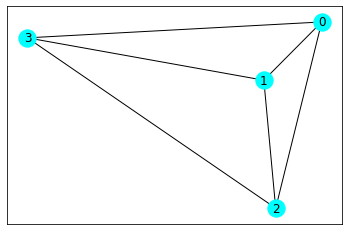

In [101]:
nx.draw_networkx(induced,node_color='cyan')

<h3>Clique Percolation

In [102]:
## Community using Clique percolation 

from networkx.algorithms.community import k_clique_communities  # find k-clique community using percolation method
c = list(k_clique_communities(G,6))
print(c)


[frozenset({'jury', 'rabbit', 'cat', 'alice', 'court', 'march hare', 'king', 'frog', 'queen', 'knave', 'dormouse', 'white rabbit', 'hatter', 'duchess'}), frozenset({'cat', 'alice', 'gryphon', 'king', 'queen', 'mock turtle'})]


In [103]:
len(c)

2

<h1> Inference</h1>
<br>
<b>
<ol>
    <li>It can be seen that alice is the most central character  as seen in the book and our centrality analysis further proves it(highest degree/betweeness/closeness/eigenvector )</li>
    <li>It can be seen that dum and dee always appear together but based on the analysis dee takes the major role of talking as dee has more centrality tham dum </li>
    <li>It can be seen from the graphs that the 'all the gardeners' are linked to the actual network just because of alice and the same can be seen from alice's ego network</li>
    <li>It is evident from Alice's ego network that the king, queen, duchess, white rabbit and hatter are strongly connected to Alice. They are the ones with whom Alice has had most of the conversation in the story.</li>
    <li>Since Dee Dum are closely related and also occur together everytime they form a seperate community</li>
    <li>Similarly Gryphon and the Mock Turtle also occur together most of the time and hence ocur in pair always in the network as well. They both form a seperate community.</li>
    <li>The protagonists Alice, the queen, duchess, white rabbit and caterpillar form a seperate community</li>
    <li>We see from Hatter's ego graph that he has communication with almost all major characters in the story, which is also true for the actual story</li>
    
</ol></b>